
# Project: No-Show Medical Appointment
_______________
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments) and it collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

The dataset consists of 14 variables as follows:
- **PatientId :** Unique identification of a patient
- **AppointmentID :** Unique identification of each appointment
- **Gender:** Male or Female
- **ScheduledDay:** The date on which appointment was scheduled
- **AppointmentDay:** The date on which pateint has to show-up for the appointment
- **Age:** How old the patient is
- **Neighbourhood:** Place where patient lives (where patient comes from to visit the doctor)
- **Scholarship:** Whether the patient is enrolled in Bolsa_Família, which is a social welfare program of the Government of Brazil
- **Hipertension:** Hypertension, also known as high blood pressure. Part of patient's medical history.
- **Diabetes:** Part of patient's medical history.
- **Alcoholism:** Drinking of alcohol that results in significant mental or physical health problems. Part of patient's medical history.
- **Handcap:** Handicap, part of patient's medical history.
- **SMS_received:** Frequent reminders of scheduled appointment.
- **No-show:** Whether the patient attended the appointment or not. 'Yes' means the patient did not attended the appointment

**NOTE:** Where there is 0 and 1 in the data entries: 
- **0 = False / No**
- **1 = True / Yes**

### Question(s) for Analysis
>- What are the general characteristics of the patients under consideration?
>- Patients that miss appointments, what do they have in common?
>- What is the proportion of those who fail to show up for their appointment?
>- Which neighbourhoods have the highest no-showing rate?
>- Is there any possibility that the patients with hypertension also have diabetes?

<a id='wrangling'></a>
## Data Wrangling
Let's dive straight in, shall we?

### First of all, Libraries, where you at?

In [1]:
# loading the necessary libraries for our analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#loading and checking the first 5 rows of the dataset
nshow = pd.read_csv('KaggleV2-May-2016.csv')
nshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#display the columns' names
pd.DataFrame({'Columns':nshow.columns})

,Columns
0,PatientId
1,AppointmentID
2,Gender
3,ScheduledDay
4,AppointmentDay
5,Age
6,Neighbourhood
7,Scholarship
8,Hipertension
9,Diabetes


By printing out the column, we notice that some labels are not properly worded or are spelt incorrectly.

In [4]:
#checking the number of rows (the first value in the bracket) and columns (the second one) of our data
nshow.shape

(110527, 14)

In [5]:
#checking for the statistical summary of the data
nshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the table above, we notice that most of the patients tend to be young as the mean age is **37**.
Another observation is that the minimum age in the dataset is **-1**, this is definitely an error and justice will be carried out as we proceed.
From the mean value, we can say that about **10%** of our patients are beneficiaries of scholarship offer and about **20%** are hypertension patients.


In [6]:
#checking for the overall info about the dataset under consideration
nshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The observation from this section is that ScheduledDay and AppointmentDay are in object datatype instead of datetime, this will be adjusted as we progress.

In [7]:
#checking for the null values
nshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#checking for the number of unique values in each field
nshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
After wrapping up our wrangling, we proceed with cleaning the data and making sure that our observations earlier noted are properly executed.
 

In [9]:
# dropping the insignificant columns
df=nshow.drop(['PatientId', 'AppointmentID'],axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To start with, we realize that these two columns have no value to add to our analysis so we drop them

In [10]:
# removing the absurd age from the data as we noticed earlier that the minimum age is -1
print('The number of rows with age less than 1 is {} which has now been dropped as evident below.'.format(df.Age[df.Age < 0].count()))
df.drop(df[df.Age<0].index, inplace=True)
df[df.Age<0]


The number of rows with age less than 1 is 1 which has now been dropped as evident below.


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
# changing the columns to lowercase for easier references
df.columns = df.columns.str.lower()
df.columns


Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

In [12]:
# correcting wrong spellings of the field names as earlier observed
df.rename(columns= {
    'hipertension':'hypertension',
    'handcap' : 'handicap'
}, inplace=True) 
df.columns


Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no-show'],
      dtype='object')

In [13]:
# changing the data types of the columns wrongly coded as already noted above
df.astype({'scheduledday':'datetime64[ns]','appointmentday':'datetime64[ns]'})


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
Now, we are set to perform our EDA as we have carried out cleaning of the data to a noticeable extent. This is the section where we try to provide solutions to the questions earlier raised. 


### EDA on the general characteristics of the patients.

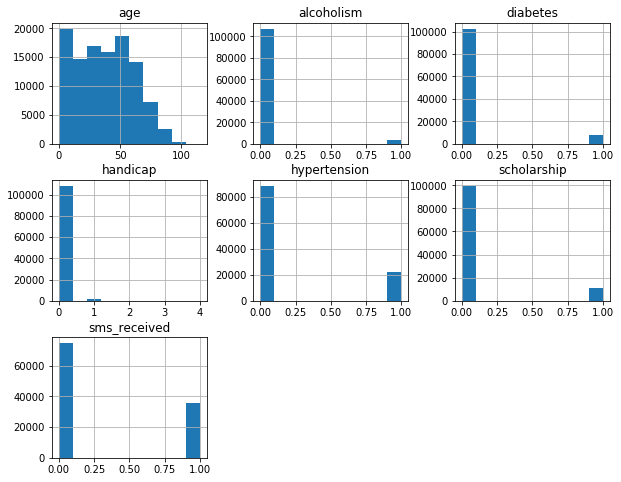

In [14]:
df.hist(figsize=(10,8));

**Reminder:** *( 0 = False, 1 = True )*
- Just as we earlier noted from the statistical summary, now through visualization, we see that we have more young patients than the old ones.
- Also, most of the patients dont have alcohol problems and same for other ailments as shown above.
- Plus most of the patients are without scholarship and those that receive sms as a reminder for their appointment are less than those that don't.
(--Note:--)

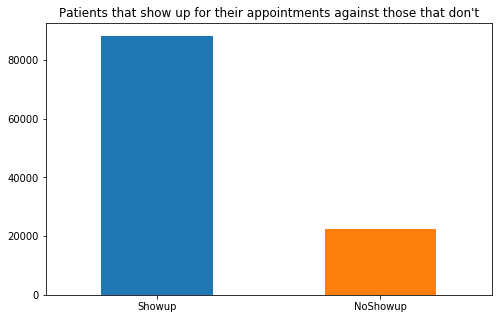

In [15]:
# Checking the proportion of those that show up for appointments against those that don't
df['no-show']=df['no-show'].replace(['No','Yes'],['Showup','NoShowup'])

df['no-show'].value_counts().plot(kind='bar', rot=0, figsize=(8,5))
plt.title("Patients that show up for their appointments against those that don't");

This means that the number of the patients that show up is more than those that don't which is normal else something must definitely be wrong somewhere.

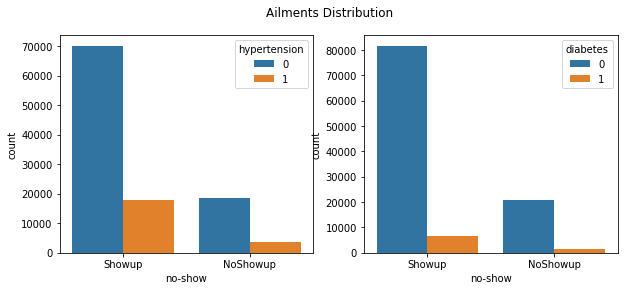

In [16]:
# checking for the distribution of ailments suffered by the patients between those that show up and those that don't 
fig, ax = plt.subplots(1,2,figsize=(10,4))

sns.countplot(x='no-show', hue='hypertension', data=df, ax = ax[0])
sns.countplot(x='no-show', hue='diabetes', data=df, ax=ax[1])

fig.suptitle('Ailments Distribution');

This shows that most patients are without the problem of hypertension whether the comparison is between those that show up and those that don't.
Likewise, there is the same scenario for those with diabetes and the number of those with diabetes among the patients that refuse to honor their appointment is very minute.

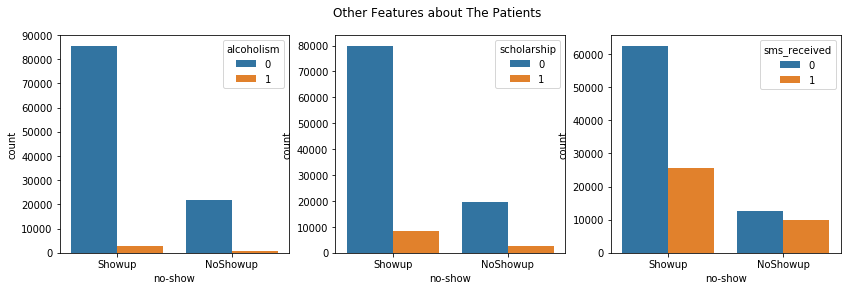

In [17]:
# checking for the distribution of other features about the patients
fig, ax = plt.subplots(1,3,figsize=(14,4))

sns.countplot(x='no-show', hue='alcoholism', data=df, ax = ax[0])
sns.countplot(x='no-show', hue='scholarship', data=df, ax=ax[1])
sns.countplot(x='no-show', hue='sms_received', data=df, ax=ax[2])

fig.suptitle('Other Features about The Patients');

From the first axis, we are able to confirm that the patients are not alcholic both of those that show up for appointment and those that refuse to.
Furthermore, we see that majority of the patients are without scholarship and amongst those that have the scholarship, those that show up for their appointments are much more than those that don't.
We would have assumed that patients definitely don't receive sms alert that's why they don't show up, interestingly, the number of those that receive sms and don't show up is almost the same as those that don't receive.

### EDA focusing on those that miss their appointments

In [18]:
# creating a dataframe of patients that fail to show up for their appointments
dfns = df[df['no-show'] == 'NoShowup'].reset_index(drop=True)
dfns.head()


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,NoShowup
1,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,NoShowup
2,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,NoShowup
3,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,NoShowup
4,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,NoShowup


In [19]:
# printing the proportion of those that fail to show up
def NoshowProportion(x,y):
    noshow=len(x.index)/len(y.index)
    print('The percentage of those that fail to show up for appointment is {:.0%}' .format(noshow))
NoshowProportion(dfns,df)

The percentage of those that fail to show up for appointment is 20%


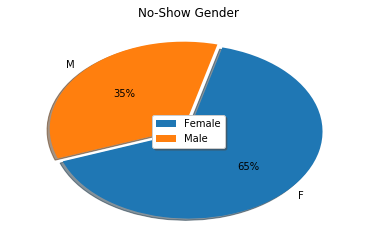

In [20]:
# checking for the gender that mostly miss their appointment
explode=[0,0.05]
dfns.gender.value_counts().plot(kind= 'pie', explode=explode, autopct='%.0f%%', startangle=200,shadow=True)
plt.axis('off')
plt.title("No-Show Gender")
plt.legend(('Female', 'Male'),shadow=bool, loc=10);

Between the two gender classes, we definitely have more female(65%) missing their appointments than their male(35%) counterpart.

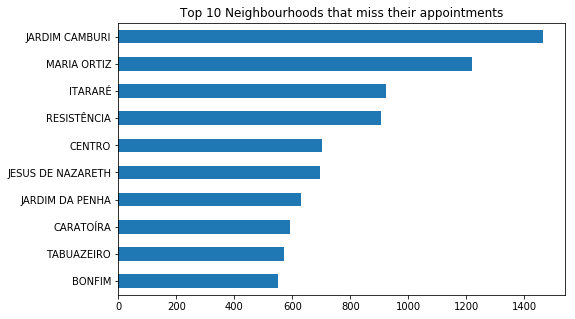

In [21]:
# Getting to know the top 10 neighbourhoods that miss their appointments the most
dfns.neighbourhood.value_counts()[:10].plot(kind='barh', figsize=(8,5), color=sns.color_palette()[0])
plt.title('Top 10 Neighbourhoods that miss their appointments')
plt.gca().invert_yaxis();

What we observe here is that most of the patients who miss their appointments are actually from Jardim Camburi, followed by Maria Ortiz and others as displayed above.

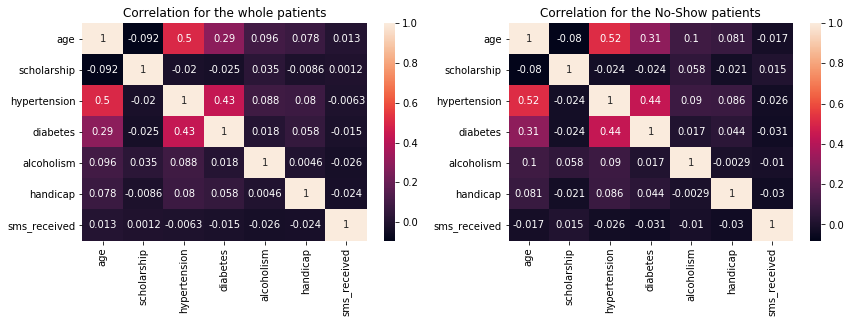

In [22]:
#checking for correlation using the features we have about the whole patients and specifically for those who miss their meeting
corr=df.corr()
corr2=dfns.corr()

f,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(14,4))

snscorr1=sns.heatmap(corr, annot=True, ax=ax1)
ax1.set_title('Correlation for the whole patients')
snscorr2=sns.heatmap(corr2, annot=True, ax=ax2)
ax2.set_title('Correlation for the No-Show patients');

There is a similar trend of correlation for the whole patients and for those that miss their consultation session.
The heatmap also shows us that there is a strong positive correlation(0.5 and 0.52) between hypertension and age, meaning that as the patients age, they tend to be more hypertensive.
Likewise, there is a positive correlation though weak between age and diabetes, and a moderate positive correlation between hypertension and diabetes indicating that patients with hypertension tends to be diabetic too.

<a id='conclusions'></a>
## Conclusions

As earlier stated, this analysis is carried out to look into the characteristics or the peculiarities of the patients that miss their medical appointments. 
In the course of carrying out EDA, we are able to generate insights and provide solutions to the questions earlier posed. 
The insights generated include but not limited to the fact that
- Most of the patients are young and just few of them have alcohol problems or other ailment such as diabetes.
- The proportion of the patients that fail to show up is actually about 20% of the whole patients population
- Amongst those that don't show up, there is only a slight difference between those that receive sms and those that don't, indicating that patients still fail to show up despite receiving sms alert.
- JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA and CENTRO are the leading neighbourhoods where the no-show patients reside.
- There is a positive correlation though weak between age and diabetes, and a moderate positive correlation between hypertension and diabetes indicating that patients with hypertension tends to be diabetic too.

### Limitations
- The conclusions from this analysis should be taken as tentative as further analysis might be required. 
- Likewise, the proximity of the patient residence to the neighborhood is not given. With this, we are not really sure whether distance is actually the reason why some neighborhoods fail to show up for their medical appointments.


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0